In [1]:
from corre import *

Use scipy logsumexp().


In [2]:
path = "../2yrdata/"
cci=pd.read_csv(path+'two_years_cci.csv',index_col = "date").drop(["Alaska","Hawaii"],axis=1)
cmi=pd.read_csv(path+'two_years_cmi.csv',index_col = "date")
daily = pd.read_csv(path+"two_year_daily.csv",index_col="date").drop(["Alaska","Hawaii"],axis=1)
ern = pd.read_csv(path+"ern.csv",index_col="date")

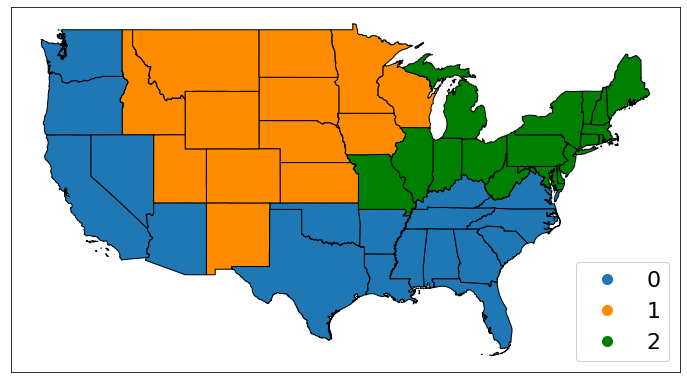

In [3]:
#97 great
np.random.seed(71)
lab,c=kshape_clust(daily,3)
plot_clust(lab,3)

In [4]:
cp_ind = [74,315,448,603]

In [5]:
cp=['2020-06-14', '2021-02-10', '2021-06-23', '2021-11-25']

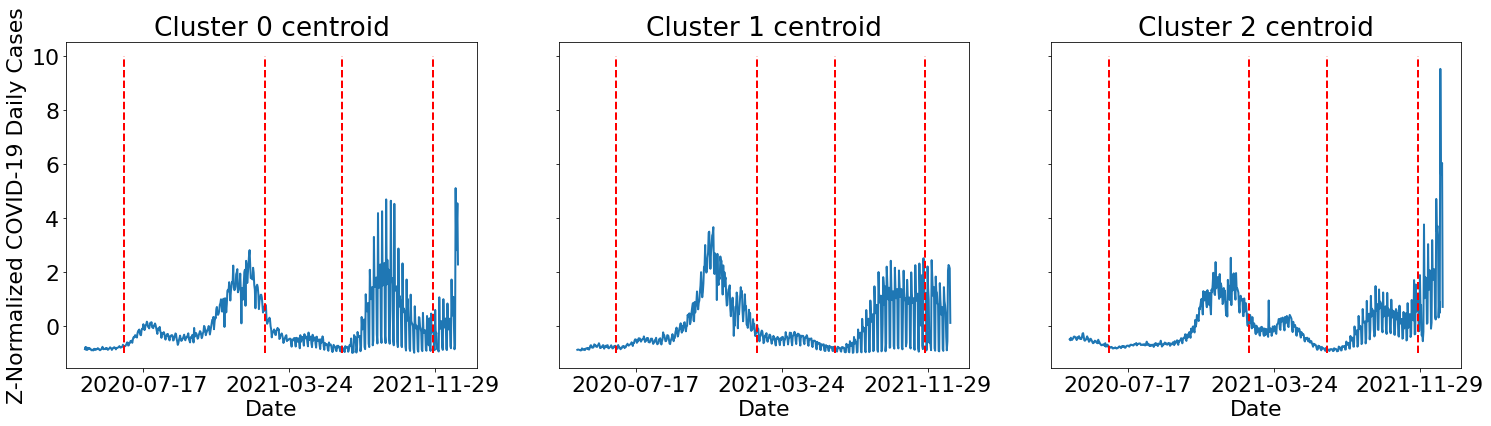

In [6]:
plot_centroids(c,cp_ind,False)

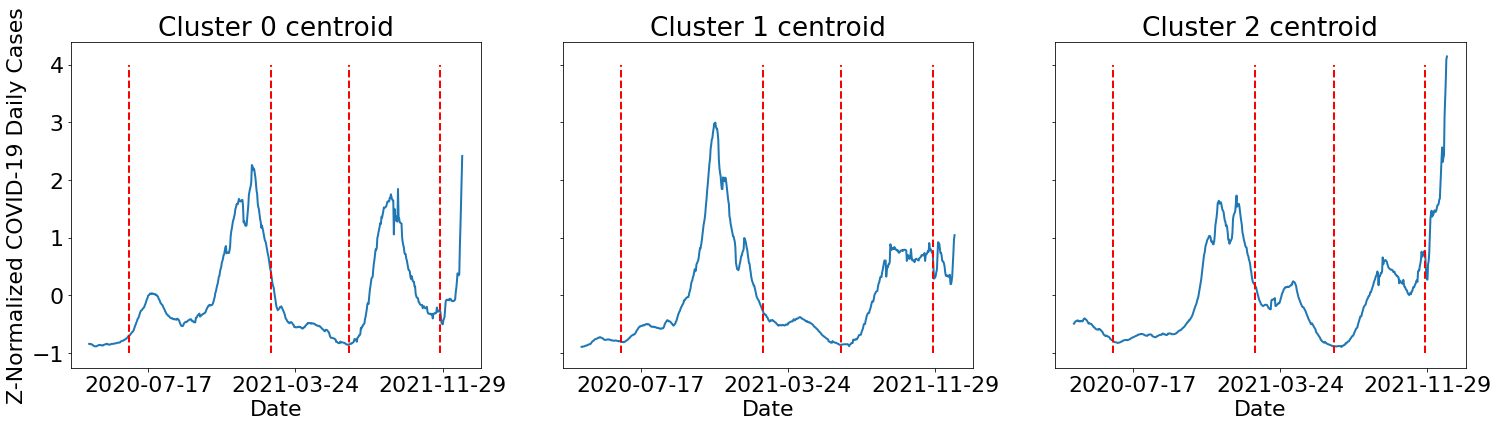

In [7]:
plot_centroids(c,cp_ind)

In [4]:
s = "2020-04-06"
e = "2021-12-21"

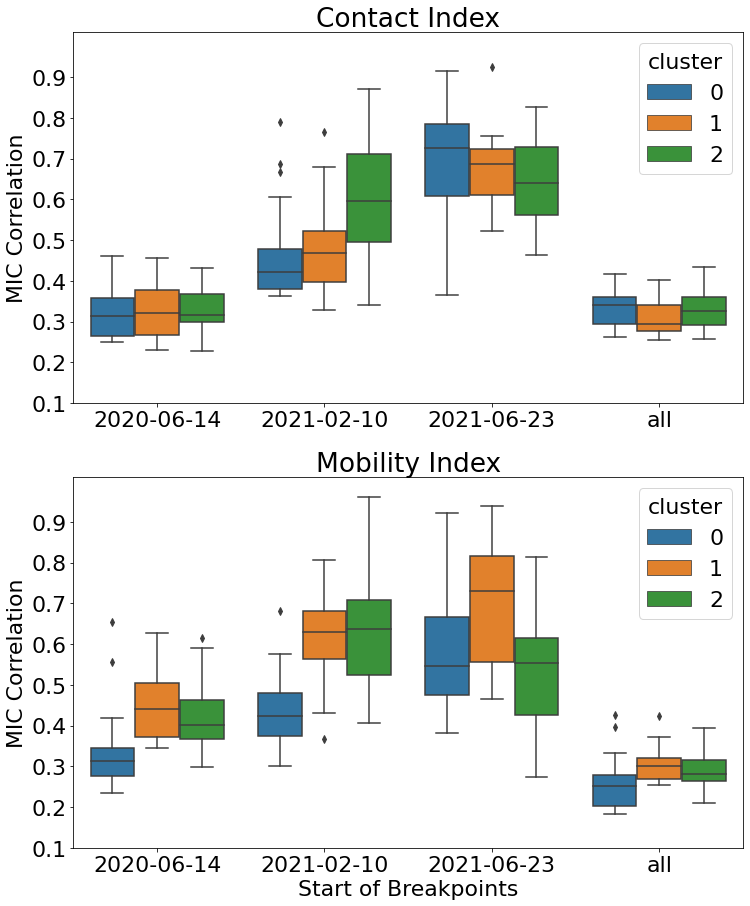

In [6]:
a,b=spatial_mic_boxplot(cp,lab,cci[s:e],cmi[s:e],ern,glob=True,fname="global_ern_spatial_boxplot.pdf")

In [13]:
a.groupby("label").describe()[["2021-02-10","2021-06-23"]]

2021-02-10                                                              \
           count      mean       std       min       25%       50%       75%   
label                                                                          
0           18.0  0.471076  0.128822  0.362314  0.378962  0.421365  0.477245   
1           13.0  0.486629  0.129903  0.328689  0.396657  0.467462  0.521325   
2           18.0  0.592095  0.142755  0.341666  0.495418  0.596707  0.710794   

                2021-06-23                                                    \
            max      count      mean       std       min       25%       50%   
label                                                                          
0      0.789694       18.0  0.690247  0.138771  0.365488  0.608396  0.725558   
1      0.765619       13.0  0.686241  0.098659  0.521337  0.610939  0.685904   
2      0.870990       18.0  0.649831  0.099872  0.462877  0.562864  0.640061   

                           
            75%       max  
label                      
0      0.784274  0.915517  
1      0.724136  0.924819  
2      0.729267  0.826746

In [12]:
0.596707-0.316454

0.280253

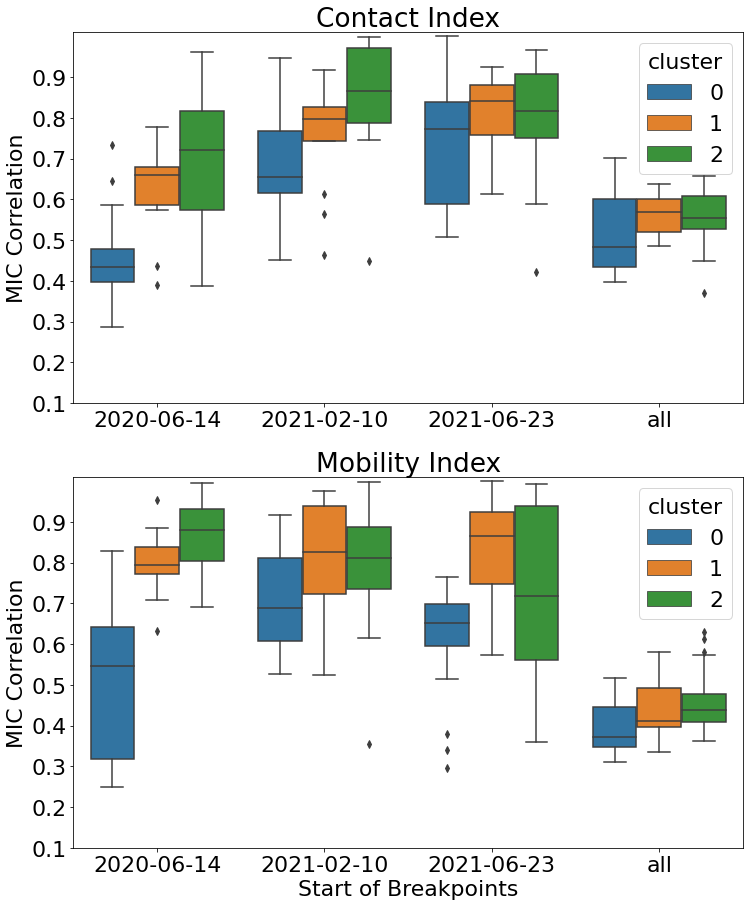

In [6]:
a,b=spatial_mic_boxplot(cp,lab,cci,cmi,daily,glob=True,fname="global_daily_spatial_boxplot.pdf")

In [4]:
us = gpd.read_file("zip://../2021data/cb_2018_us_state_5m.zip")
fil_func = lambda x: x in ["HI","GU","MP","AS","PR","AK","VI"]
sub_us = us[pd.Series(not fil_func(a) for a in us["STUSPS"])][["STATEFP","GEOID","STUSPS","NAME","geometry"]]
sub_us = sub_us.to_crs("EPSG:3395")

In [5]:
sub_us

,STATEFP,GEOID,STUSPS,NAME,geometry
0,31,31,NE,Nebraska,"POLYGON ((-11583184.194 5007437.040, -11583089..."
1,53,53,WA,Washington,"MULTIPOLYGON (((-13617528.852 6078624.532, -13..."
2,35,35,NM,New Mexico,"POLYGON ((-12139409.729 3672934.612, -12139372..."
3,46,46,SD,South Dakota,"POLYGON ((-11583649.954 5590892.849, -11582816..."
4,48,48,TX,Texas,"POLYGON ((-11871720.418 3727440.508, -11871204..."
5,06,06,CA,California,"MULTIPOLYGON (((-13202867.311 3935367.958, -13..."
6,21,21,KY,Kentucky,"MULTIPOLYGON (((-9952591.877 4348107.020, -995..."
7,39,39,OH,Ohio,"MULTIPOLYGON (((-9210096.774 5073370.864, -920..."
8,01,01,AL,Alabama,"MULTIPOLYGON (((-9800984.638 3548540.267, -980..."
9,13,13,GA,Georgia,"POLYGON ((-9529523.377 4137300.133, -9523671.0..."


In [16]:
# a_prime = pd.merge(sub_us,a,left_on="NAME",right_on="state")
# b_prime = pd.merge(sub_us,b,left_on="NAME",right_on="state")
# a_prime.to_file('cci_mic_states.shp')
# b_prime.to_file('cmi_mic_states.shp')

In [16]:
a_read = gpd.read_file("zip://../2yrdata/cci_mic_states.zip")
a_read = a_read.to_crs("EPSG:3395")

Text(0.5, 1.0, '2020-06-14 CCI: 0.357665')

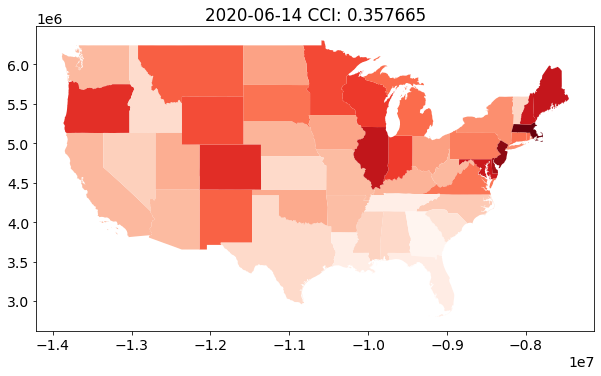

In [36]:
a_read.plot(column="2020-06-14",cmap="Reds")
plt.title("2020-06-14 CCI: 0.357665")

Text(0.5, 1.0, '2021-02-10 CCI: 0.560682')

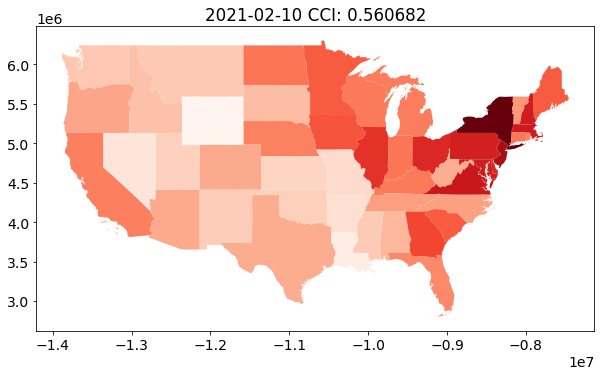

In [37]:
a_read.plot(column="2021-02-10",cmap="Reds")
plt.title("2021-02-10 CCI: 0.560682")

Text(0.5, 1.0, '2021-06-23 CCI: 0.258148')

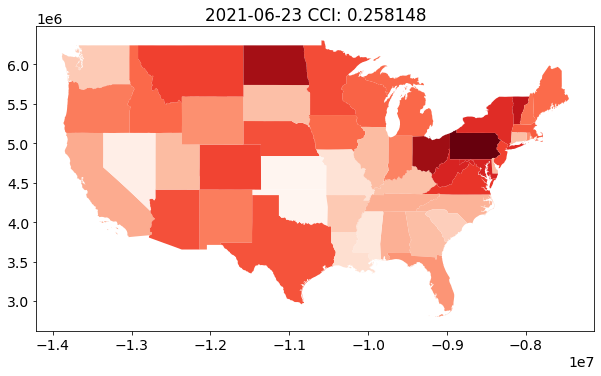

In [38]:
a_read.plot(column="2021-06-23",cmap="Reds")
plt.title("2021-06-23 CCI: 0.258148")

Text(0.5, 1.0, 'All two years CCI: 0.234849')

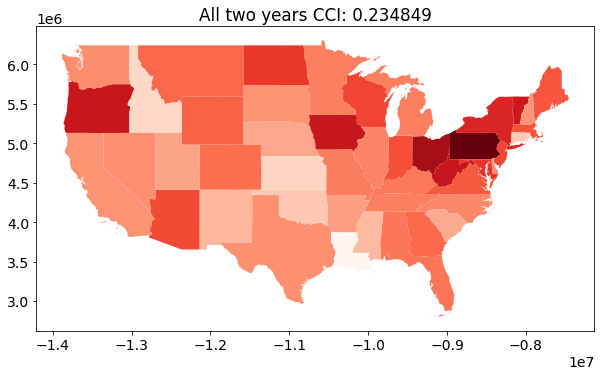

In [39]:
a_read.plot(column="all",cmap="Reds")
plt.title("All two years CCI: 0.234849")

In [20]:
b_read = gpd.read_file("zip://../2yrdata/cmi_mic_states.zip")
b_read = b_read.to_crs("EPSG:3395")

Text(0.5, 1.0, '2020-06-14 CMI: 0.674762')

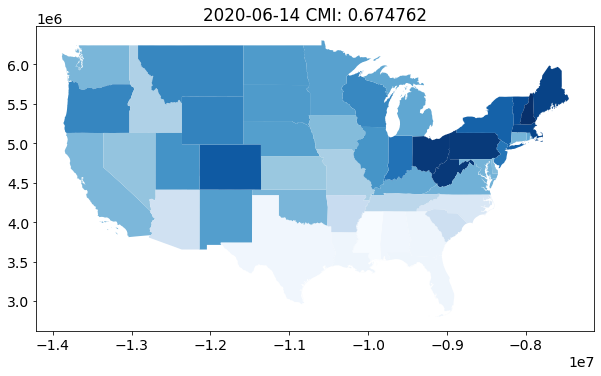

In [40]:
b_read.plot(column="2020-06-14",cmap="Blues")
plt.title("2020-06-14 CMI: 0.674762")

Text(0.5, 1.0, '2021-02-10 CMI MIC correlation')

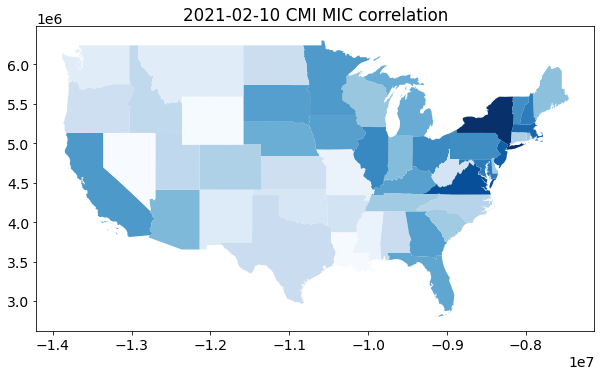

In [34]:
b_read.plot(column="2021-02-10",cmap="Blues")
plt.title("2021-02-10 CMI: 0.409750")

Text(0.5, 1.0, '2021-06-23 CMI: 0.375869')

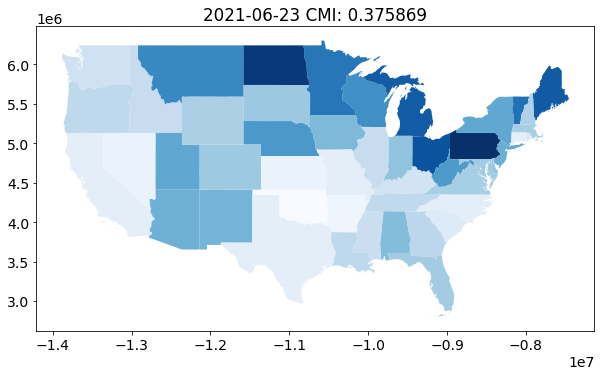

In [41]:
b_read.plot(column="2021-06-23",cmap="Blues")
plt.title("2021-06-23 CMI: 0.375869")

Text(0.5, 1.0, 'All two years CMI: 0.266042')

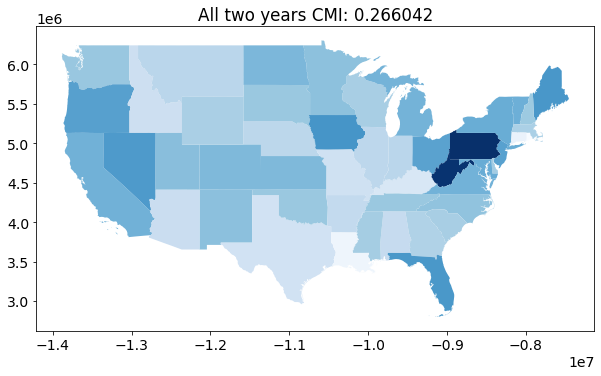

In [42]:
b_read.plot(column="all",cmap="Blues")
plt.title("All two years CMI: 0.266042")